# Laboratorium 6
## Roksana Cieśla, gr.2, piątek 12:45 </br></br>

In [1]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Odczytuje scieżke do oryginalnego pliku w celu wczytania datasetu
original_data_path = os.getcwd()[:-13] + "original_data/2_LUBELSKIE.csv"

# Wczytywanie datasetu
df = pd.read_csv(original_data_path, index_col=0)
df

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,4,Samsung,39.0,M,2.0
1,7,Dyson,39.0,M,1.0
2,5,Dyson,34.0,K,2.0
3,8,Samsung,NaN,K,1.0
4,4,Dyson,42.0,M,0.5
...,...,...,...,...,...
462,5,Samsung,27.0,K,3.5
463,6,Dyson,41.0,M,3.5
464,6,Dyson,NaN,K,1.0
465,4,Electrolux,46.0,K,2.5


In [3]:
df['Płeć kupującego'] = df['Płeć kupującego'].map({'K':'K', 'M':'M', 'b.d.':np.nan})
df

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,4,Samsung,39.0,M,2.0
1,7,Dyson,39.0,M,1.0
2,5,Dyson,34.0,K,2.0
3,8,Samsung,NaN,K,1.0
4,4,Dyson,42.0,M,0.5
...,...,...,...,...,...
462,5,Samsung,27.0,K,3.5
463,6,Dyson,41.0,M,3.5
464,6,Dyson,NaN,K,1.0
465,4,Electrolux,46.0,K,2.5


In [4]:
# Opis i informacje dotyczące datasetu
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 466
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dni od zakupu    467 non-null    int64  
 1   Marka            467 non-null    object 
 2   Wiek kupującego  417 non-null    float64
 3   Płeć kupującego  465 non-null    object 
 4   Ocena            467 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 21.9+ KB


In [5]:
df.describe()

,Dni od zakupu,Wiek kupującego,Ocena
count,467.000000,417.000000,467.000000
mean,6.927195,39.844125,2.382227
std,2.520101,9.494795,1.079980
min,1.000000,18.000000,0.000000
25%,5.000000,33.000000,1.500000
50%,7.000000,40.000000,2.500000
75%,8.000000,46.000000,3.000000
max,17.000000,70.000000,5.000000


In [6]:
# Zapis pliku do folderu "analysis_data"
analisys_data = os.getcwd()[:-13] + "analysis_data/analisys_data.csv"
df.to_csv(analisys_data)

In [7]:
doc_n: str = "command_files"
documents_path = os.getcwd()[:-len(doc_n)] + "documents/diagrams"

Wykresy:

In [8]:
def repr_categ(df, column, title, x_label, y_label):
    vc = df[column].value_counts()
    vc.plot(kind='bar', figsize=(10, 5), color = "plum")
    plt.title(title, fontsize=25)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.savefig(documents_path + f"/{title}.png")
    plt.grid()
    plt.show()
    
def repr_quant(df, column, bins, title, x_label, y_label):
    fig, ax = plt.subplots(figsize=(10, 5))
    n, bins, patches = ax.hist(df[column], bins=bins, color = "mediumpurple")
    plt.title(title, fontsize=25)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    fig.savefig(documents_path + f"/{title}.png")
    plt.grid()
    plt.show()

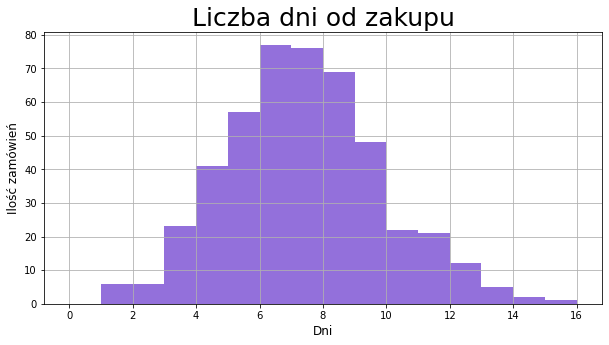

6     77
7     76
8     69
5     57
9     48
4     41
3     23
10    22
11    21
12    12
2      6
1      6
13     5
14     2
16     1
17     1
Name: Dni od zakupu, dtype: int64


In [9]:
repr_quant(df, "Dni od zakupu", range(0, 17), "Liczba dni od zakupu", "Dni", "Ilość zamówień")
print(df['Dni od zakupu'].value_counts())

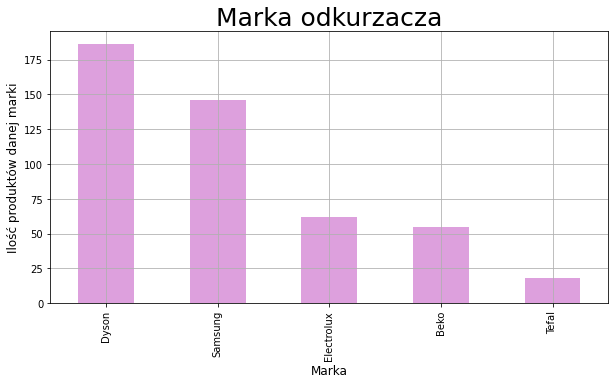

Dyson         186
Samsung       146
Electrolux     62
Beko           55
Tefal          18
Name: Marka, dtype: int64


In [10]:
repr_categ(df, "Marka", "Marka odkurzacza", "Marka", "Ilość produktów danej marki")
print(df["Marka"].value_counts())

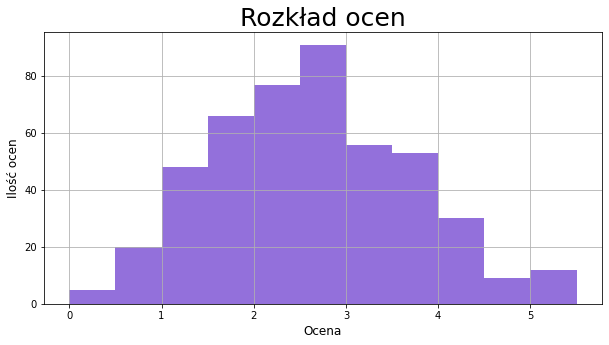

2.5    91
2.0    77
1.5    66
3.0    56
3.5    53
1.0    48
4.0    30
0.5    20
5.0    12
4.5     9
0.0     5
Name: Ocena, dtype: int64


In [11]:
repr_quant(df, "Ocena", np.arange(0, 6, .5), "Rozkład ocen", "Ocena", "Ilość ocen")
print(df["Ocena"].value_counts())

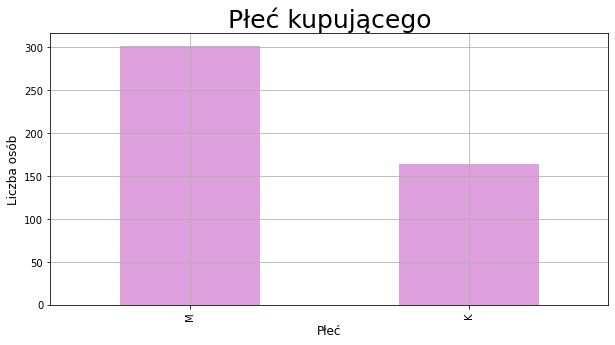

M    301
K    164
Name: Płeć kupującego, dtype: int64


In [12]:
repr_categ(df, "Płeć kupującego", "Płeć kupującego", "Płeć", "Liczba osób")
print(df["Płeć kupującego"].value_counts())

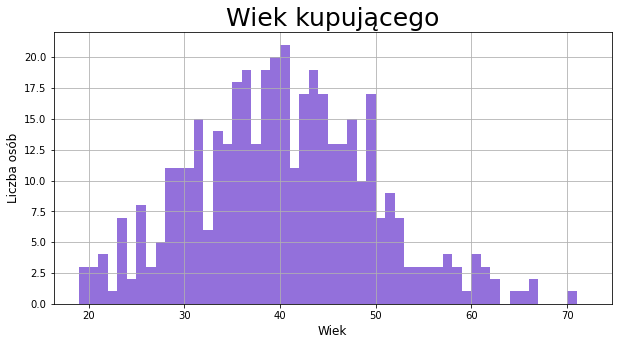

count    417.000000
mean      39.844125
std        9.494795
min       18.000000
25%       33.000000
50%       40.000000
75%       46.000000
max       70.000000
Name: Wiek kupującego, dtype: float64
40.0    21
39.0    20
43.0    19
38.0    19
36.0    19
35.0    18
49.0    17
42.0    17
44.0    17
47.0    15
31.0    15
33.0    14
34.0    13
45.0    13
46.0    13
37.0    13
30.0    11
41.0    11
29.0    11
28.0    11
48.0    10
51.0     9
25.0     8
50.0     7
23.0     7
52.0     7
32.0     6
27.0     5
21.0     4
57.0     4
60.0     4
56.0     3
61.0     3
26.0     3
19.0     3
54.0     3
20.0     3
58.0     3
55.0     3
53.0     3
66.0     2
62.0     2
24.0     2
22.0     1
64.0     1
70.0     1
59.0     1
65.0     1
18.0     1
Name: Wiek kupującego, dtype: int64


In [19]:
repr_quant(df, "Wiek kupującego", range(19, 73), "Wiek kupującego", "Wiek", "Liczba osób")
print(df["Wiek kupującego"].describe())
print(df["Wiek kupującego"].value_counts())

In [14]:
# Lista datasetow ze wzgledu na marke 
df_lst = []
marki = df['Marka'].unique().tolist()

for i in range(0, len(marki)):
    df_marki = df.loc[df['Marka'] == marki[i]]
    df_lst.append(df_marki)

print(df_lst[0])

     Dni od zakupu    Marka  Wiek kupującego Płeć kupującego  Ocena
0                4  Samsung             39.0               M    2.0
3                8  Samsung              NaN               K    1.0
6                9  Samsung             60.0               M    3.5
8                6  Samsung             39.0               M    4.0
17               9  Samsung             46.0               K    1.5
..             ...      ...              ...             ...    ...
442             11  Samsung             18.0               M    2.5
450              7  Samsung             43.0               M    2.5
452              8  Samsung             37.0               K    3.0
455              4  Samsung             49.0               K    3.5
462              5  Samsung             27.0               K    3.5

[146 rows x 5 columns]


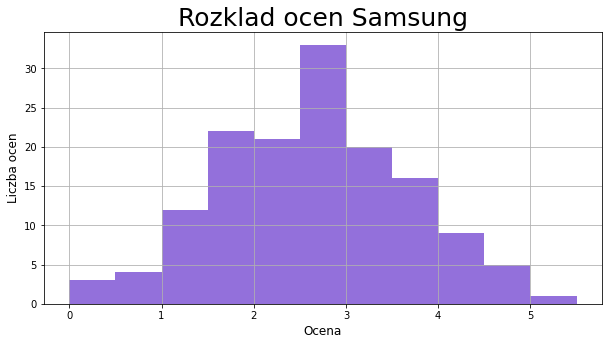

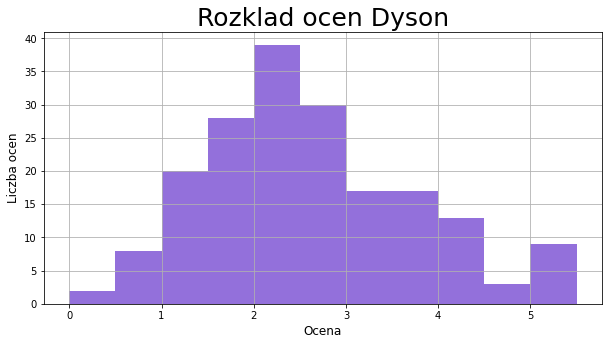

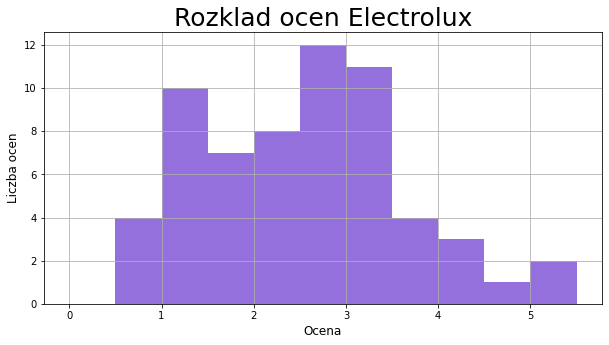

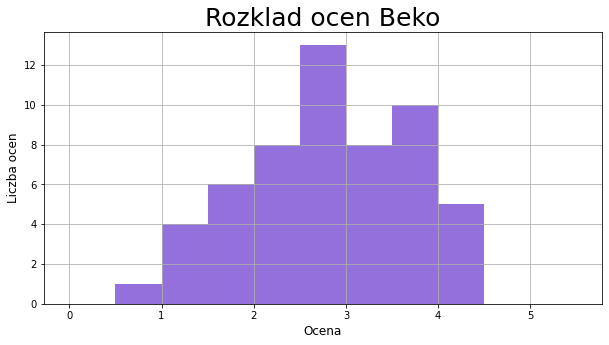

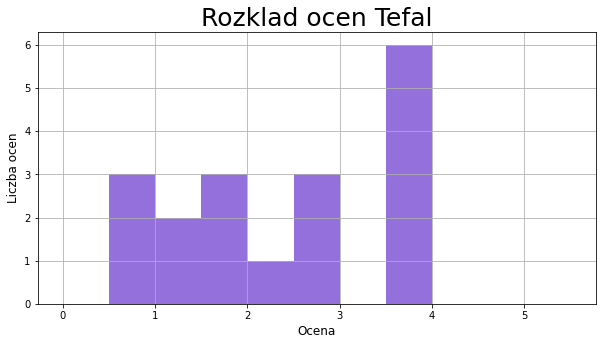

In [15]:
# Rozkład ocen dla poszczególnych marek
for i in range(0, len(df_lst)):
    repr_quant(df_lst[i], 'Ocena', np.arange(0, 6, .5), title=f"Rozklad ocen {marki[i]}", x_label="Ocena", y_label="Liczba ocen")

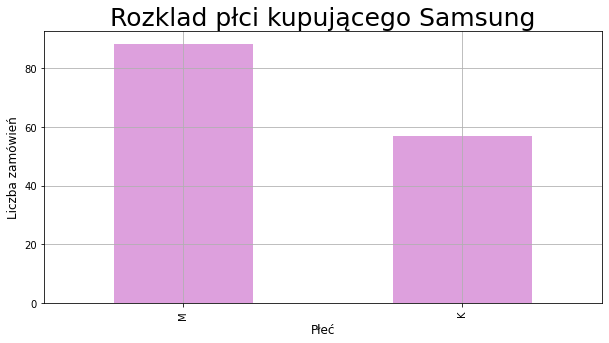

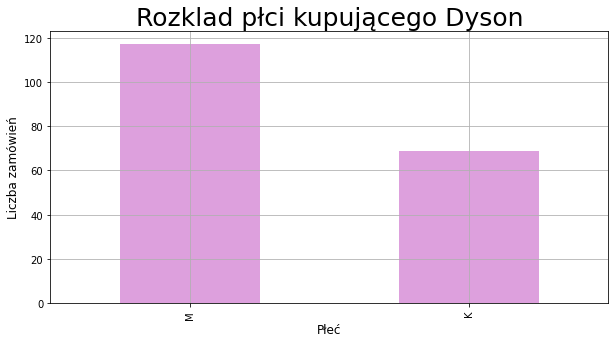

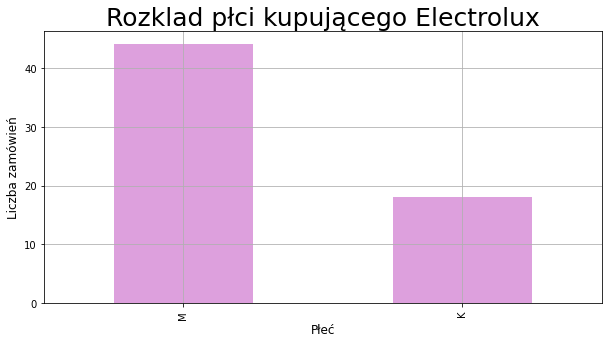

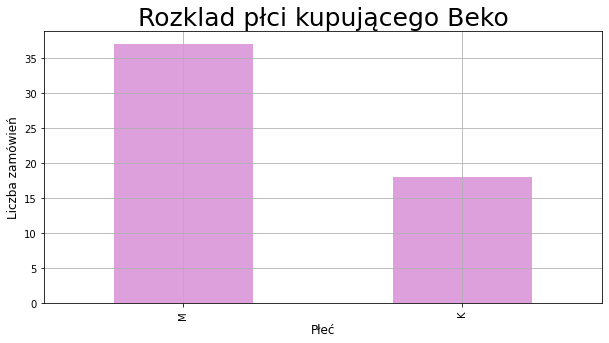

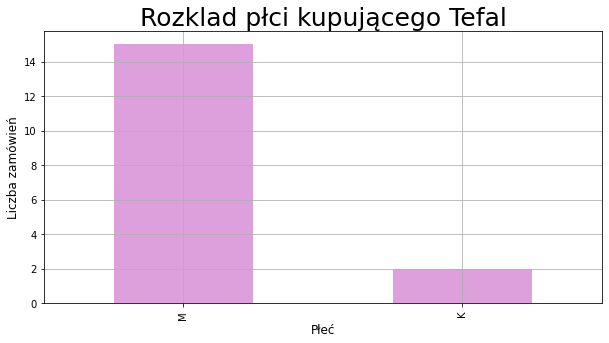

In [16]:
# Rozkład płci kupującego dla poszczególnych marek
for i in range(0, len(df_lst)):
    repr_categ(df_lst[i], 'Płeć kupującego', title=f"Rozklad płci kupującego {marki[i]}", x_label="Płeć", y_label="Liczba zamówień")

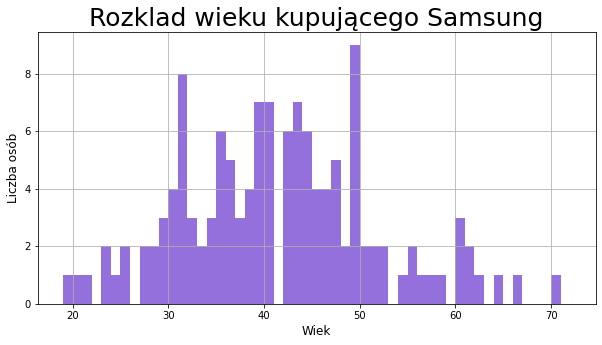

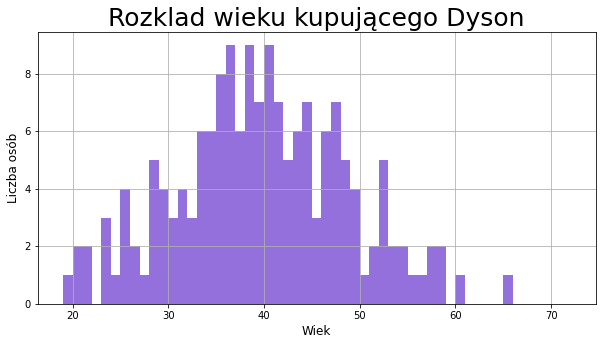

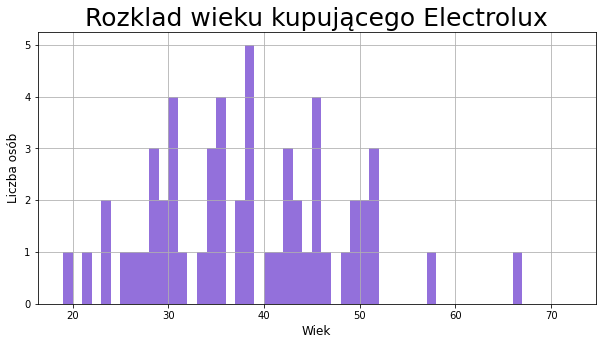

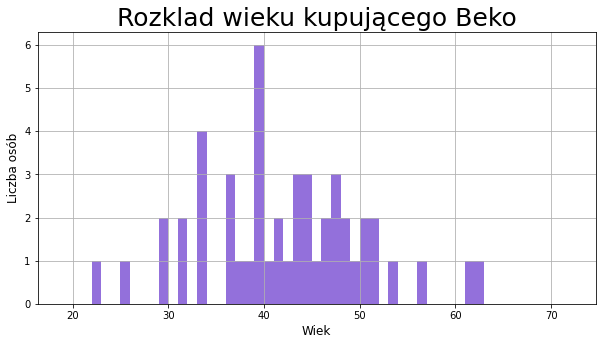

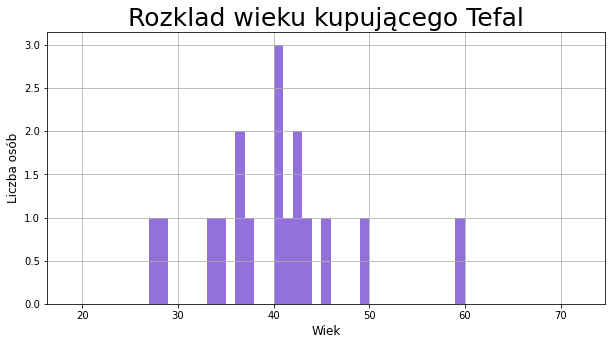

In [17]:
# Rozkład wieku kupującego dla poszczególnych marek
for i in range(0, len(df_lst)):
    repr_quant(df_lst[i], 'Wiek kupującego', range(19, 73), title=f"Rozklad wieku kupującego {marki[i]}", x_label="Wiek", y_label="Liczba osób")